<a href="https://colab.research.google.com/github/SarahTTAN107/code_snippets/blob/master/theory_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Make recommendation engine - content based:
based on similarity between 2 items 
Each item (movies) will have several features => we need to calculate the distance between vectors (representing items).

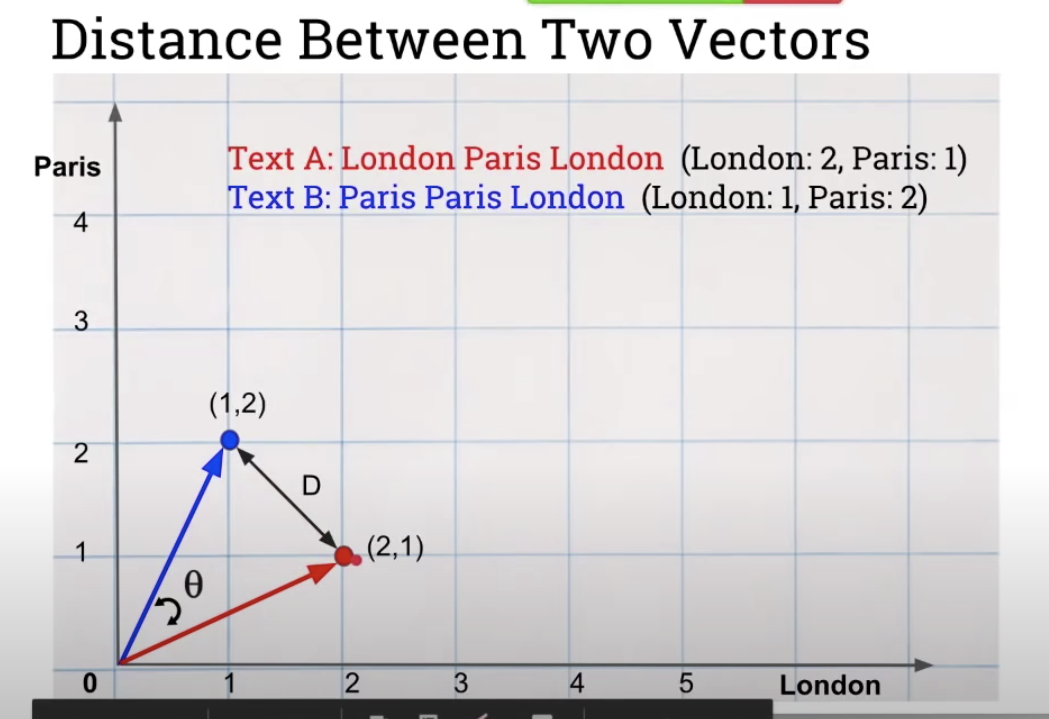

In order to do that, we need to calculate cosine similarity (cos(theta)). Let's take the below example to see how to calculate cosine similarity


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
text = ["London Paris London", "Paris Paris London"]
cv = CountVectorizer()
cv_fit = cv.fit_transform(text)

In [ ]:
print(cv.get_feature_names())
print(cv_fit.toarray())

['london', 'paris']
[[2 1]
 [1 2]]


In [ ]:
similarity_scores = cosine_similarity(cv_fit)

In [ ]:
print(similarity_scores)

[[1.  0.8]
 [0.8 1. ]]


**Intepretation:** the first sentence is similar to the first sentence by 100%, and by the second sentence by 80%; and vice versa. This is called a **similarity matrix**

### When to use eucledian and when to use cosine/angular similarity?
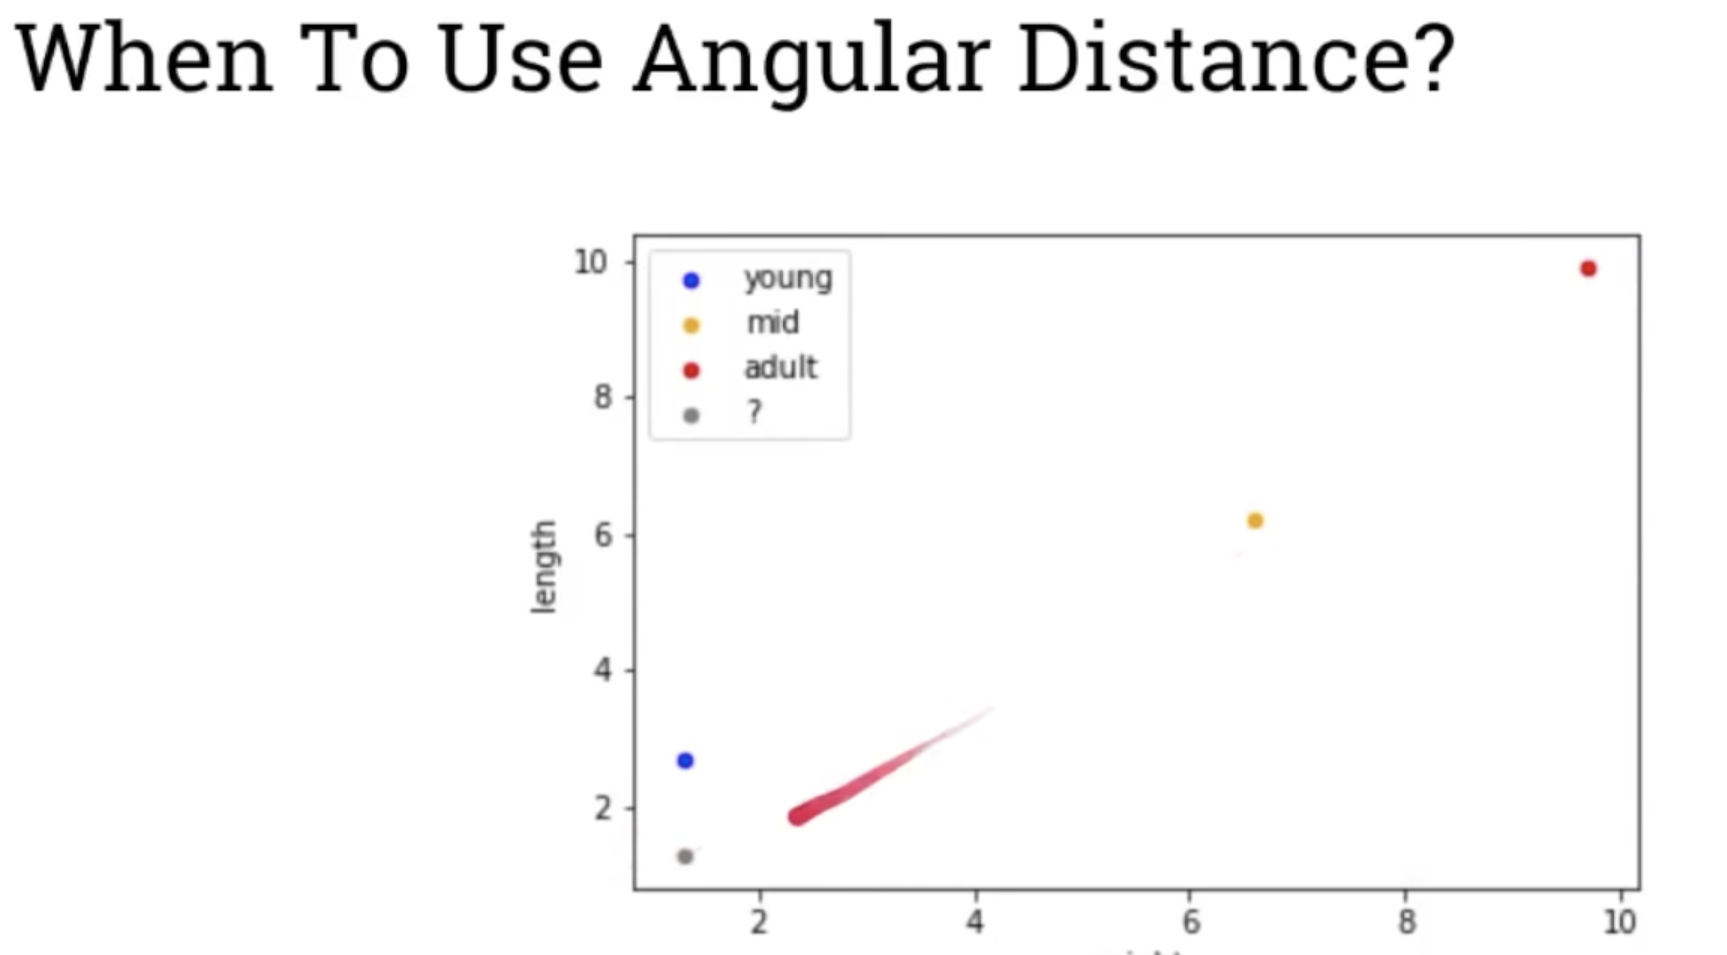
If we use angular distance, the grey point will be assigned to mid or adult, which is wrong. Hence, in this case we should use euclidian.
Depending on the context of the problem, we will use angular or euclidian distance accordingly.

An example would be: 
- User 1 bought 1 x eggs, 1x flour and 1x sugar
- User 2 bought 100x eggs, 100x flour, and 100x sugar
- User 3 bought 1x eggs, 1x Vodka, and 1x Red bull

Under cosine similarity, User 1 and 2 would be similar to each other, while with euclidian distance, User 1 and 3 are actually similar to each other.

So in cases in which magnitude (e.g., document sizes) is not the main factor that determines the difference here (1x - 100x doesn't matter to us) but more of the nature (content of the document) is what we are interested in, then cosine is the one. If then the quantity/magnitude matters in differentiating items (1x - 100x matters), then use euclidian.

### Action

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


###### helper functions. Use them when needed #######
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]


def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]


##################################################

##Step 1: Read CSV File
df = pd.read_csv("movie_dataset.csv")

##Step 2: Select Features - and handling missing values and so on
features = ['keywords', 'cast', 'genres', 'director']

##Step 3: Create a column in DF which combines all selected features
#### function to transform each row into 1 string
for feature in features:
    df[feature] = df[feature].fillna('')


def combine_features(row):
    return row['keywords'] + " " + row['cast'] + " " + row['genres'] + " " + row['director']


#### apply to all rows: using apply()
df['combined_features'] = df.apply(combine_features, axis=1)
print("Combined features:", df["combined_features"].head())

##Step 4: Create count matrix from this new combined column
cv = CountVectorizer()

count_matrix = cv.fit_transform(df['combined_features'])

##Step 5: Compute the Cosine Similarity based on the count_matrix
cosine_sim = cosine_similarity(count_matrix)

movie_user_likes = "Avatar"

## Step 6: Get index of this movie from its title
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index]))  # create [(0,1), (1,0.8), (2,0.3), (3, 0.5)]

## Step 7: Get a list of similar movies in descending order of similarity score
sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1],
                               reverse=True)  # sort into [(0,1), (1,0.8), (3, 0.5), (2,0.3)]

## Step 8: Print titles of first 50 movies
i = 0
for movie in sorted_similar_movies:
    print(get_title_from_index(movie[0]))
    i += 1
    if i > 50:
        break



Combined features: 0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6 Dan...
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
Name: combined_features, dtype: object
Avatar
Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1
Star Trek Into Darkness
Star Trek Beyond
Alien
Lockout
Jason X
The Helix... Loaded
Moonraker
Planet of the Apes
Galaxy Quest
Gravity
Alien³
Jupiter Ascending
The Wolverine
Silent Running
Zathura: A Space Adventure
Trekkies
Cargo
Wing Commander
Star Trek
Lost in Space
Babylon A.D.
The Fifth Element
Oblivion
Titan A.E.
AVP: Alien vs. Predator
The Empire Strikes Back
Dragonball Evolution
Superman Returns
Divergent
John Carter
The Black Hole
The Ice Pirates
Memoirs of an Invisible Man
Starship Troopers
The Astronaut's Wife
Machete Kills
Soldier
The Abyss
Damnation Alley
Men in Black
Space Cowbo

# Complete road map to prepare NLP

Mindmap: 
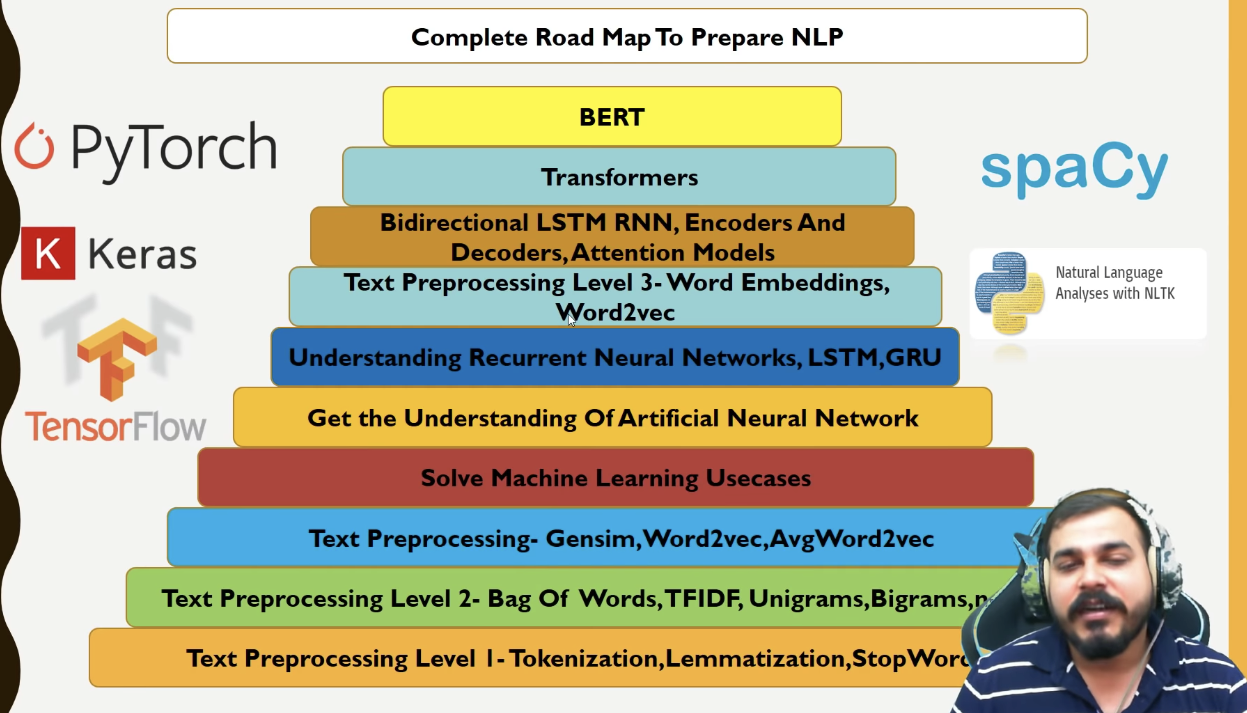

### Tokenization


Taking all paragraph and convert to list of indiv. words or sentences.

In [ ]:
paragraph = """My name is Sarah Nguyen. This is my statement.
I have a dream. To live and to learn. To love and to share. 
To grow and to believe. 
I am a woman, a scientist, a learner, a developer. 
I contribute for a better world, with my mind and my soul.
 I learn to be kind, I learn to love, and I learn to care. 
 I will not shy away from my mistakes and pitfalls, be truthful with my emotions, and grow as a compassionate, rational, warm, caring person - I don't aim to lead, but I aim to love."""

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenize sentences
sentences = nltk.sent_tokenize(paragraph)
# this should return all the sentences of the paragraph.

In [ ]:
# Tokenize words
words = nltk.word_tokenize(paragraph)
# return all number of words in the paragraph.

In [ ]:
print(sentences)

['I have a dream.', 'To live and to learn.', 'To love and to share.', 'To grow and to believe.']


In [ ]:
print(words)

['I', 'have', 'a', 'dream', '.', 'To', 'live', 'and', 'to', 'learn', '.', 'To', 'love', 'and', 'to', 'share', '.', 'To', 'grow', 'and', 'to', 'believe', '.']


### Stemming and Lemmatization Intuition

Stemming is the technique to reduce infected words to their word stems.

For example: 

- history & historical => histor**i**; 

- finally, final, finalized => fin**a**;

- going, goes, gone => g**o**

Lemmatization is a bit different: It does stemming, but then converted into the base word that human can understand.

For example: 

- history, historical => histor**y**;

- finally, final, finalized => **final**

But for the example going, goes, gone, both stemming and lemmatization convert the words to go. Lemmatization produces result that is more meaningful, but also takes significantly more time compares to Stemming. 

Stemming is used in Sentiment analysis, classification problems like gmail spam classifier and so on. Because human understanding is not the goal here, but rather getting the machine to understand the paragraph and does the classification or prediction job in the background.

Lemmatization, on the other hand, is used for, e.g., chatbot, in which the meaning of the words and sentences matter to the end user. 

### Stemming code

In [ ]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords as stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
paragraph = """My name is Sarah Nguyen. This is my statement.
I have a dream. To live and to learn. To love and to share. 
To grow and to believe. 
I am a woman, a scientist, a learner, a developer. 
I contribute for a better world, with my mind and my soul.
 I learn to be kind, I learn to love, and I learn to care. 
 I will not shy away from my mistakes and pitfalls, be truthful with my emotions, and grow as a compassionate, rational, warm, caring person - I don't aim to lead, but I aim to love."""

stopwords: of, from, the, and, our, of, them...
These words are repeated again and again in the paragraph, while not providing much value in the sentence and help us understanding the context of the words. 
We need stopwords from corpus in this case to remove these unneccessary words, but keep in mind that there are some applications that need these stopwords.

In [ ]:
stopwords.words('english')[:5]

['i', 'me', 'my', 'myself', 'we']

In [ ]:
# Tokenizing the paragraph
sentences = nltk.sent_tokenize(paragraph)

In [ ]:
# Stemming
stemmer = PorterStemmer()

## for each and every sentence in the paragraph, we will remove the stop words. 
for i in range(len(sentences)):
  words = nltk.word_tokenize(sentences[i])
  words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
  sentences[i] = ' '.join(words)

In [ ]:
sentences

['My name sarah nguyen .',
 'thi statement .',
 'I dream .',
 'To live learn .',
 'To love share .',
 'To grow believ .',
 'I woman , scientist , learner , develop .',
 'I contribut better world , mind soul .',
 'I learn kind , I learn love , I learn care .',
 "I shi away mistak pitfal , truth emot , grow compassion , love , care , factual person - I n't aim lead , I aim love ."]

Now we can see the stemming applied to all sentences.
Again, remember: 

- the issue with stemming is that it **produces intermediate representation of the word which may not have any meaning**

example: intelligen, fina, thi...

Which may not be friendly to our end user.

### Lemmatization code

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
paragraph = """My name is Sarah Nguyen. This is my statement.
I have a dream. To live and to learn. To love and to share. 
To grow and to believe.
I am a woman, a scientist, a learner, a developer. 
I contribute for a better world, with my mind and my soul.
 I learn to be kind, I learn to love, and I learn to care. 
 I will not shy away from my mistakes and pitfalls, be truthful with my emotions, and grow as a compassionate, rational, warm, caring person - I don't aim to lead, but I aim to love."""

Again, let's remove stop words and do lemmatization at the same time.

In [ ]:
sentences = nltk.sent_tokenize(paragraph)

In [ ]:
# Lemmatization 
lemmatizer = WordNetLemmatizer()
for i in range(len(sentences)):
  words = nltk.word_tokenize(sentences[i])
  words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
  sentences[i] = ' '.join(words)

In [ ]:
# Now sentences will consist of all lemmatized words, joined together into a list.
print(len(sentences))
sentences[:5]

10


['My name Sarah Nguyen .',
 'This statement .',
 'I dream .',
 'To live learn .',
 'To love share .']

### Bag of words intuition

**The first step in NLP is always to lowering the case of the sentences** - This is because an uppercased word and a lowercased word will be considered 2 different entity during the processing and learning process.

However, sometimes there are words that must be uppercased, for example, country name or code - "US", "FI", or "Finland". If that's the case, we should keep these special words that we wish to remain uppercased in a separate list, and later on during processing, exclude those special words and process the remaining words. 

**Second step is to apply stemming or lemmatization, and stopwords, if the paragraph needs that.** That means that if the original text is rather simple, we can skip this step and go straight to bag of words.

Now that we have the simplified the sentences, we need to vectorize the sentences. This is where bag of word steps in. 

----- 
#### bag of word processing
Given the simplified version of the sentences, we:

1. Get a dict of unique words in the passage and their frequencies. **This dict must be sorted by descending order**
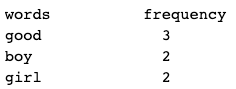


2. Now officially the vectorization part: **Each unique word will be considered a feature, and each sentence is considered a record. If the feature apear X times in the record, the value of the cell will be X, else 0. This will create a matrix that looks something like this**: 
      
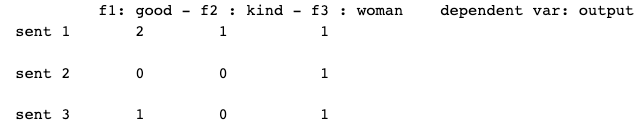

3. Now f1, f2, f3 become the independent features, and we have an output column as the dependent variables.

**What is the disadvantages of bag of words:**
 - The issue with bag of words is that given two words having the same frequency (e.g., 1 for kind and 1 for woman as the example above), we won't be able to determine which word is more important. In cases like sentiment analysis, **we need to know which word is more important in the text, and bag of words does not provide the appropriate weight for individual words in order to determine that**.

Hence, we have Tfidf or word2vec and other newer solutions to make up for this issue. 

With smaller datasets, we can still use bag of words for sentiment analysis. But if we have large datasets, word2vec is a much better option.







### Bag of word code

In [ ]:
paragraph = """My name is Sarah Nguyen. This is my statement.
I have a dream. To live and to learn. To love and to share. 
To grow and to believe.
I am a woman, a scientist, a learner, a developer. 
I contribute for a better world, with my mind and my soul.
 I learn to be kind, I learn to love, and I learn to care. 
 I will not shy away from my mistakes and pitfalls, be truthful with my emotions, and grow as a compassionate, rational, warm, caring person - I don't aim to lead, but I aim to love."""

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
sentences = nltk.sent_tokenize(paragraph)
stem_corpus = [] # after cleaning, we store data in corpus list in order to intepret the change

In [ ]:
# Cleaning: Stemming, remove stopwords
ps = PorterStemmer() # Here we use stemming since the text is quite small and simple, the purpose later is to do sentiment analysis
for i in range(len(sentences)):
  review = re.sub('[^a-zA-Z]', ' ', sentences[i]) # replace all characters apart from A to Z
  review = review.lower() # lower case
  review = review.split() # get a list of word
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] # if the word is not in stopwords list, we will apply stemming to it, and putting all the words into a list 
  review = ' '.join(review) # then after that, we join all the separate words into 1 sentence
  stem_corpus.append(review) # then append the sentence back to corpus list

In [ ]:
stem_corpus

['name sarah nguyen',
 'statement',
 'dream',
 'live learn',
 'love share',
 'grow believ',
 'woman scientist learner develop',
 'contribut better world mind soul',
 'learn kind learn love learn care',
 'shi away mistak pitfal truth emot grow compassion ration warm care person aim lead aim love']

In [ ]:
# Creating the bag of word model:
from sklearn.feature_extraction.text import CountVectorizer # remember, bag of words = frequency
cv = CountVectorizer(max_features=1500)
stem_X = cv.fit_transform(stem_corpus).toarray()

In [ ]:
stem_X

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3

We can see that in this case, the sentence does not make much sense with stemming. If our use case needs more meaningful words, or if meaningful words play a role in increasing accuracy, we can try lemmatization, which is the code below. 

In [ ]:
lemmatized_corpus = []

In [ ]:
wordnet = WordNetLemmatizer()
for i in range(len(sentences)): 
  review = re.sub('[^a-zA-Z]', ' ', sentences[i])
  review = review.lower()
  review = review.split()
  review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  lemmatized_corpus.append(review)
lemmatized_corpus[:5]
# now we can see that the intepretation makes sense, but lemmatization takes more time

['name sarah nguyen', 'statement', 'dream', 'live learn', 'love share']

In [ ]:
#now let's do bag of words tranformation
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
lemmatized_X = cv.fit_transform(lemmatized_corpus).toarray()

In [ ]:
lemmatized_X

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0

now, the model should be able to understand our input :) 

### TF-IDF Intuition

Stands for term frequency - inverse document frequency
As mentioned, bag of words doesn't highlight the importance of a word in the paragraph. TF-IDF is meant to cover that disadvantage.

TF-IDF also needs us to count frequency of unique words in the passage and build vectors from there.

After we have counted the frequency of unique words, we should have a matrix like this: 

original sentences: 

sent1: He is a good boy 

sent2: She is a good girl

sent3: Good boy and girl

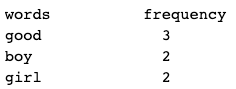

**First step is to calculate term frequency**: **Term frequency = number of repeatation of words in a sentence / number of words in a sentence**

Note that here we talk about 1 sentence. 
The term frequency matrix should look like this: 

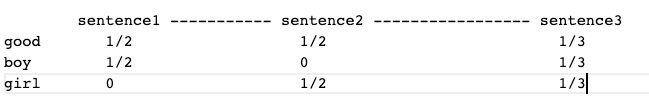


**Second step is to calculate inverse document frequency**: **log(number of sentences / number of sentences containing the words)**
IDF matrix should look something like this: 

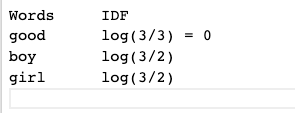

**third step is to multiply term frequency and inverse document frequency**.

A final TF IDF matrix should look something like this: 

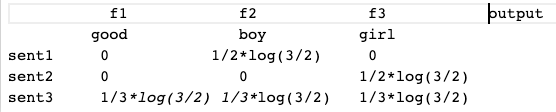


In this case, we can see that since all the sentences have "good", the semantic meaning of "good" is being downplayed in TF-IDF matrix. Instead, the focus is now more on the words "boy" and "girl". We have managed to somewhat bring an element of semantic meaning into the transformation so that the computer could understand which words are more important than others (having higher weight)

### TF-IDF code

In [ ]:
# packages
import nltk

In [ ]:
paragraph = """My name is Sarah Nguyen. This is my statement.
I have a dream. To live and to learn. To love and to share. 
To grow and to believe.
I am a woman, a scientist, a learner, a developer. 
I contribute for a better world, with my mind and my soul.
I learn to be kind, I learn to love, and I learn to care. 
I will not shy away from my mistakes and pitfalls, be truthful with my emotions, and grow as a compassionate, rational, warm, caring person - I don't aim to lead, but I aim to love.
"""

In [ ]:
# Cleaning the text
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
wordnet = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
lemmatized_corpus = []
for i in range(len(sentences)):
  review = re.sub('[^a-zA-Z]', ' ', sentences[i])
  review = review.lower()
  review = review.split()
  review = [wordnet.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
  review = ' '.join(review)
  lemmatized_corpus.append(review)

In [ ]:
lemmatized_corpus

['name sarah nguyen',
 'statement',
 'dream',
 'live learn',
 'love share',
 'grow believe',
 'woman scientist learner developer',
 'contribute better world mind soul',
 'learn kind learn love learn care',
 'shy away mistake pitfall truthful emotion grow compassionate rational warm caring person aim lead aim love']

In [ ]:
# Create TF-IDF transformation
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
lemmatized_X = cv.fit_transform(lemmatized_corpus).toarray()

In [ ]:
lemmatized_X

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.57735027, 0.57735027, 0.        , 0.        , 0.        ,
        0.57735027, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.